In [69]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [70]:
data = pd.read_csv('passenger_flight_data.csv')


In [71]:
# Understanding data
data.head()


,Age,Gender,Nationality,Previous_Flights,Frequent_Destination,Flight_Class,Loyalty_Program,Membership_Level,Payment_Method,Email,...,Origin,Destination,Number_of_Stops,Flight_Duration_Hours,Baggage_Count,Hand_Baggage_Count,Additional_Services,Flight_Date,Flight_Type,No_Show
0,56,Female,India,3,Paris,First,True,Gold,Cash,NaN,...,ORD,DXB,0,12,1,0,False,02/10/2022,International,1
1,69,Male,Canada,4,London,Business,False,Gold,Cash,NaN,...,LAX,CDG,0,10,1,0,True,11/08/2021,International,0
2,46,Male,Germany,3,Sydney,Business,False,NaN,Credit Card,NaN,...,DFW,CDG,0,7,0,1,False,06/10/2022,Domestic,1
3,32,Male,Brazil,1,Sydney,Economy,True,Platinum,Credit Card,user288@example.com,...,DFW,DXB,0,13,2,0,False,25/04/2021,International,0
4,60,Male,India,0,Paris,Economy,True,Platinum,Cash,user678@example.com,...,LAX,CDG,0,5,0,0,False,10/07/2022,Domestic,0


In [72]:
data.loc[data.duplicated( )]
#No hay filas duplicadas 

,Age,Gender,Nationality,Previous_Flights,Frequent_Destination,Flight_Class,Loyalty_Program,Membership_Level,Payment_Method,Email,...,Origin,Destination,Number_of_Stops,Flight_Duration_Hours,Baggage_Count,Hand_Baggage_Count,Additional_Services,Flight_Date,Flight_Type,No_Show


In [73]:
data.dtypes

Age                       int64
Gender                   object
Nationality              object
Previous_Flights          int64
Frequent_Destination     object
Flight_Class             object
Loyalty_Program            bool
Membership_Level         object
Payment_Method           object
Email                    object
Booking_Date             object
Booking_Channel          object
Origin                   object
Destination              object
Number_of_Stops           int64
Flight_Duration_Hours     int64
Baggage_Count             int64
Hand_Baggage_Count        int64
Additional_Services        bool
Flight_Date              object
Flight_Type              object
No_Show                   int64
dtype: object

Incialmente la fecha de reserva y vuelo era un tipo de dato "object" y se convirtió a tipo "datetime" para realizar operaciones entre fechas

In [74]:
data['Flight_Date'] = pd.to_datetime(data['Flight_Date'], format='%d/%m/%Y')

In [75]:
data['Booking_Date'] = pd.to_datetime(data['Booking_Date'], format='%d/%m/%Y')

In [76]:
data['Additional_Services'] = data['Additional_Services'].astype('int64')

In [77]:
data['Loyalty_Program'] = data['Loyalty_Program'].astype('int64')

In [78]:
data.shape

(1000, 22)

In [79]:
# Cleaning data
data.isnull().sum()
#No hay valores nulos (despues de realizar el cambio en Membership_Level)

Age                        0
Gender                     0
Nationality                0
Previous_Flights           0
Frequent_Destination       0
Flight_Class               0
Loyalty_Program            0
Membership_Level          98
Payment_Method             0
Email                    312
Booking_Date               0
Booking_Channel            0
Origin                     0
Destination                0
Number_of_Stops            0
Flight_Duration_Hours      0
Baggage_Count              0
Hand_Baggage_Count         0
Additional_Services        0
Flight_Date                0
Flight_Type                0
No_Show                    0
dtype: int64

In [80]:
# Reemplazamos NaN por "No level" en la columna Membership_Level para que no los considere valores nulos
data['Membership_Level'] = data['Membership_Level'].fillna("No level")

In [81]:
data['Email'] = data['Email'].fillna("Not registered")

In [82]:
data.head()

,Age,Gender,Nationality,Previous_Flights,Frequent_Destination,Flight_Class,Loyalty_Program,Membership_Level,Payment_Method,Email,...,Origin,Destination,Number_of_Stops,Flight_Duration_Hours,Baggage_Count,Hand_Baggage_Count,Additional_Services,Flight_Date,Flight_Type,No_Show
0,56,Female,India,3,Paris,First,1,Gold,Cash,Not registered,...,ORD,DXB,0,12,1,0,0,2022-10-02,International,1
1,69,Male,Canada,4,London,Business,0,Gold,Cash,Not registered,...,LAX,CDG,0,10,1,0,1,2021-08-11,International,0
2,46,Male,Germany,3,Sydney,Business,0,No level,Credit Card,Not registered,...,DFW,CDG,0,7,0,1,0,2022-10-06,Domestic,1
3,32,Male,Brazil,1,Sydney,Economy,1,Platinum,Credit Card,user288@example.com,...,DFW,DXB,0,13,2,0,0,2021-04-25,International,0
4,60,Male,India,0,Paris,Economy,1,Platinum,Cash,user678@example.com,...,LAX,CDG,0,5,0,0,0,2022-07-10,Domestic,0


In [83]:
# Encontrar valores únicos en cada columna especificada
variables_categoricas = ['Gender', 'Nationality', 'Flight_Class', 'Loyalty_Program',
                      'Payment_Method', 'Booking_Channel', 'Origin', 'Destination', 'Flight_Type', 'Membership_Level','Additional_Services']

for columna in variables_categoricas:
    valores_unicos = data[columna].unique()
    print(f"Valores únicos en la columna {columna}: {valores_unicos}")

Valores únicos en la columna Gender: ['Female' 'Male' 'Non-binary']
Valores únicos en la columna Nationality: ['India' 'Canada' 'Germany' 'Brazil' 'USA' 'UK' 'Australia']
Valores únicos en la columna Flight_Class: ['First' 'Business' 'Economy']
Valores únicos en la columna Loyalty_Program: [1 0]
Valores únicos en la columna Payment_Method: ['Cash' 'Credit Card' 'Mobile Payment']
Valores únicos en la columna Booking_Channel: ['Travel Agency' 'Website' 'Mobile App']
Valores únicos en la columna Origin: ['ORD' 'LAX' 'DFW' 'JFK' 'ATL']
Valores únicos en la columna Destination: ['DXB' 'CDG' 'LHR' 'SYD' 'SIN']
Valores únicos en la columna Flight_Type: ['International' 'Domestic']
Valores únicos en la columna Membership_Level: ['Gold' 'No level' 'Platinum' 'Silver']
Valores únicos en la columna Additional_Services: [0 1]


In [84]:
data.describe()

,Age,Previous_Flights,Loyalty_Program,Booking_Date,Number_of_Stops,Flight_Duration_Hours,Baggage_Count,Hand_Baggage_Count,Additional_Services,Flight_Date,No_Show
count,1000.00000,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000,1000.00000
mean,43.81900,2.952000,0.59400,2034-09-05 00:00:00,0.380000,7.974000,1.00000,0.495000,0.302000,2035-09-08 19:07:40.799999744,0.29200
min,18.00000,0.000000,0.00000,2021-01-01 00:00:00,0.000000,2.000000,0.00000,0.000000,0.000000,2021-04-25 00:00:00,0.00000
25%,31.00000,2.000000,0.00000,2027-11-03 12:00:00,0.000000,4.000000,0.00000,0.000000,0.000000,2028-10-28 12:00:00,0.00000
50%,44.00000,3.000000,1.00000,2034-09-05 00:00:00,0.000000,8.000000,1.00000,0.000000,0.000000,2035-08-31 12:00:00,0.00000
75%,56.00000,4.000000,1.00000,2041-07-07 12:00:00,1.000000,11.000000,2.00000,1.000000,1.000000,2042-07-16 06:00:00,1.00000
max,69.00000,9.000000,1.00000,2048-05-09 00:00:00,2.000000,14.000000,2.00000,1.000000,1.000000,2050-04-24 00:00:00,1.00000
std,14.99103,1.665674,0.49133,NaN,0.661844,3.828051,0.82382,0.500225,0.459355,NaN,0.45491


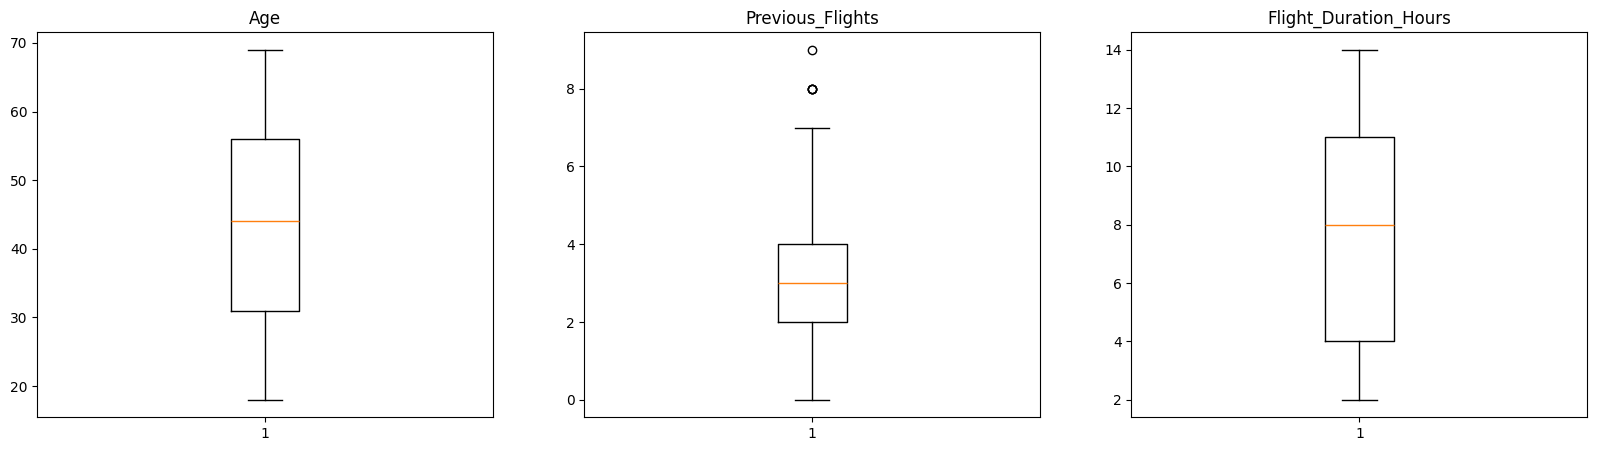

In [85]:
# Crea la gráfica de bigotes
fig, axs = plt.subplots(1, 3, figsize=(20, 5))


for i, columna in enumerate(['Age', 'Previous_Flights','Flight_Duration_Hours']):
    axs[i].boxplot(data[columna])
    axs[i].set_title(columna)

plt.show()

In [86]:
data['Previous_Flights'].value_counts()[9]

1

En la gráfica de los vuelos previos se puede observar que si hay valores atípicos, hay un registro de una persona que cuenta con 9 vuelos precios y 4 personas con 8 vuelos precios, para saber si estos valores atípicos estan teniendo un impacto en la media, se calculará ela media excluyendo los valores atípicos.

In [87]:
data = data[data['Previous_Flights'] != 8]
data = data[data['Previous_Flights'] != 9]

In [88]:
data['Previous_Flights'].mean()

2.9256281407035174

Con la descripción anterior para los datos númericos, se observa que:
* En promedio los pasajeros son de 44 años
* En promedio los pasajeros cuentan con 3 vuelos previos
* Los pasajeros hacen un máximo de 2 escalas
* El máximo de duración de vuelo es de 14h y en promedio duran 8h 
* Máximo viajan con 2 maletas documentadas
* Máximo se viaja con 1 maleta de mano y esto puede deberse a las reglas de equipaje que comunmente manejan las aerolíneas

Por otra parte, de la gráficas de caja podemos observar que no hay valores atípicos salvo en el caso de los vuelos previos. Sin embargo, al calcular la media exluyendo estos valores atípicos no se observa un valor diferente por lo que se puede concluir que no hay un impacto importante de los valores atípicos en la estadística o distribución de los datos por lo cual no se elimarán.

# ANÁLISIS DE FRECUENCIA EN VARIABLES CATEGÓRICAS

In [89]:

# ANÁLISIS DE FRECUENCIAS VARIABLES CATEGÓRICAS
def crear_grafico_pastel(data, variables_categoricas, guardar=False):
    # Obtener conteo de valores
    conteo_valores = data[variables_categoricas].value_counts()
    
    # Crear gráfico de pastel
    plt.figure(figsize=(8, 6))
    plt.pie(conteo_valores, labels=conteo_valores.index, autopct='%1.1f%%')
    plt.title(f'Distribución de {variables_categoricas}')
    plt.axis('equal')  # Asegurar que el gráfico sea un círculo
    
    # Guardar o mostrar la gráfica
    if guardar:
        archivo = f'{variables_categoricas}_distribucion.png'
        plt.savefig(archivo, dpi=300, bbox_inches='tight')  # Guardar la gráfica
        print(f'Gráfica guardada como: {archivo}')
    plt.close()  # Cerrar la figura para evitar sobreposiciones

# Lista de columnas a analizar
columnas_a_visualizar = ['Gender', 'Nationality', 'Flight_Class', 'Loyalty_Program',
                         'Payment_Method', 'Booking_Channel', 'Origin', 'Destination', 'Flight_Type']

# Iterar sobre cada columna y crear el gráfico
for variables_categoricas in columnas_a_visualizar:
    crear_grafico_pastel(data, variables_categoricas, guardar=True)


Gráfica guardada como: Gender_distribucion.png
Gráfica guardada como: Nationality_distribucion.png
Gráfica guardada como: Flight_Class_distribucion.png
Gráfica guardada como: Loyalty_Program_distribucion.png
Gráfica guardada como: Payment_Method_distribucion.png
Gráfica guardada como: Booking_Channel_distribucion.png
Gráfica guardada como: Origin_distribucion.png
Gráfica guardada como: Destination_distribucion.png
Gráfica guardada como: Flight_Type_distribucion.png


Gráfica guardada como: frecuencias_barras.png


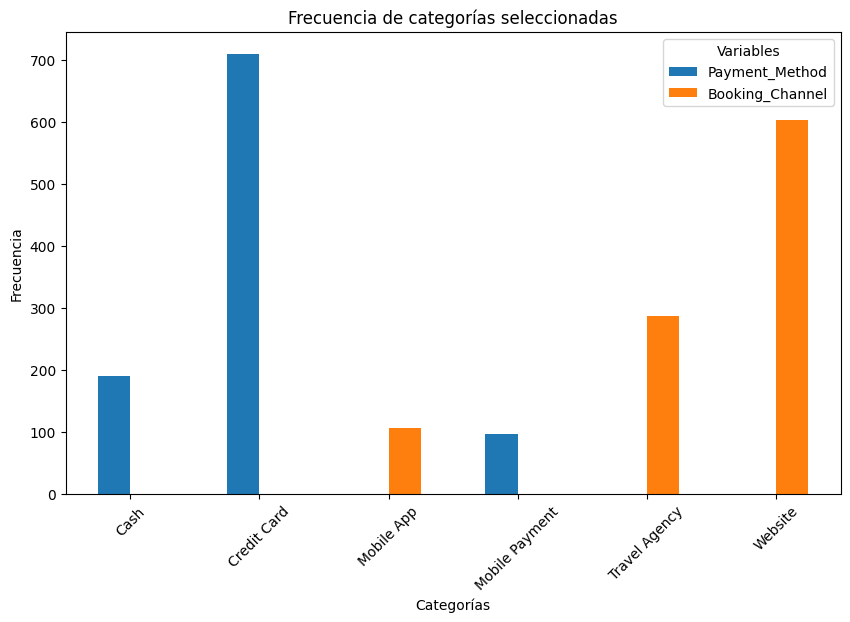

In [90]:


# ANÁLISIS DE FRECUENCIAS VARIABLES CATEGÓRICAS
def crear_grafico_barras(data, categorias, guardar=False):
    # Crear un DataFrame con los conteos de las categorías seleccionadas
    conteos = {categoria: data[categoria].value_counts() for categoria in categorias}
    df_conteos = pd.DataFrame(conteos).fillna(0)  # Reemplazar NaN con 0
    
    # Crear gráfica de barras
    df_conteos.plot(kind='bar', figsize=(10, 6))
    plt.title('Frecuencia de categorías seleccionadas')
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')
    plt.legend(title='Variables')
    plt.xticks(rotation=45)
    
    # Guardar o mostrar la gráfica
    if guardar:
        archivo = 'frecuencias_barras.png'
        plt.savefig(archivo, dpi=300, bbox_inches='tight')  # Guardar la gráfica
        print(f'Gráfica guardada como: {archivo}')
    plt.show()

# Seleccionar categorías para el análisis
categorias_a_visualizar = ['Payment_Method', 'Booking_Channel']

# Llamar a la función para generar la gráfica
crear_grafico_barras(data, categorias_a_visualizar, guardar=True)


De las gráficas anteriores se destaca que:
* La mayoría de los pasajeros vuela en clase economica (el 67%), esto puede deberse a la distribución de asientos por clase en cada vuelo
* Hay una ligera diferencia entre los pasajeros que cuentan con programa de lealtad y los que no, pero predominan los que sí
* La forma de pago más frecuente es por tarjeta de crédito
* Es más frecuente que se haga una reservación por website que por agencia o app movil

Para analizar la frecuencia de los pasajeros que registran un número telefónico o email, se transformaron los datos categóricos a datos binarios, es decir, se crearon variables dummy para estas dos variables así como para los servicios adicionales.

In [47]:
#data['registered_email'].value_counts().plot(kind='pie', autopct='%1.1f%%')
#plt.title('Frecuencia de números registrados')
#plt.show()

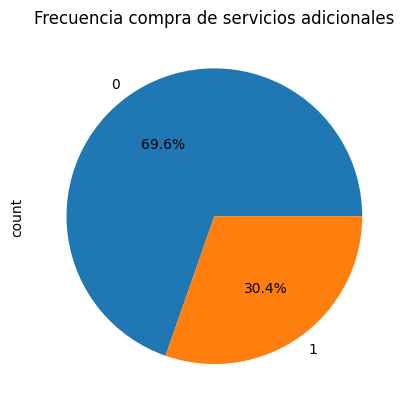

In [48]:
data['Additional_Services'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Frecuencia compra de servicios adicionales')
plt.show()

In [49]:
# Calculando la diferencia en días entre fecha de reserva y fecha de vuelo
data['Days_Difference'] = (data['Flight_Date'] - data['Booking_Date']).dt.days

# Calculando el promedio, mínimo y máximo
print("Promedio de días:", data['Days_Difference'].mean())
print("Mínimo de días:", data['Days_Difference'].min())
print("Máximo de días:", data['Days_Difference'].max())

Promedio de días: 368.6673366834171
Mínimo de días: 0
Máximo de días: 730


# Análisis de correlaciones
Se realizarán mapas de calor, tablas de contingencia y ANOVA para analizar si hay relación entre las variables númericas, y la relación de las variables categóricas


In [50]:
var_map = data[['Age', 'Previous_Flights', 'Number_of_Stops', 'Flight_Duration_Hours', 'Baggage_Count', 'Hand_Baggage_Count',]]

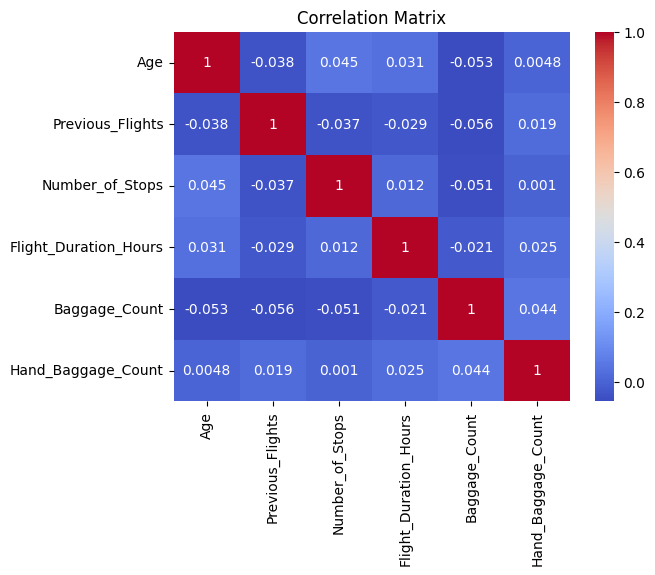

In [51]:
# Assuming 'No_Show' is a numerical variable:
correlation_matrix = var_map.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

No hay correlación entre las variables númericas.

In [52]:
data.head()

,Age,Gender,Nationality,Previous_Flights,Frequent_Destination,Flight_Class,Loyalty_Program,Membership_Level,Payment_Method,Email,...,Destination,Number_of_Stops,Flight_Duration_Hours,Baggage_Count,Hand_Baggage_Count,Additional_Services,Flight_Date,Flight_Type,No_Show,Days_Difference
0,56,Female,India,3,Paris,First,1,Gold,Cash,Not registered,...,DXB,0,12,1,0,0,2022-10-02,International,1,639
1,69,Male,Canada,4,London,Business,0,Gold,Cash,Not registered,...,CDG,0,10,1,0,1,2021-08-11,International,0,212
2,46,Male,Germany,3,Sydney,Business,0,No level,Credit Card,Not registered,...,CDG,0,7,0,1,0,2022-10-06,Domestic,1,623
3,32,Male,Brazil,1,Sydney,Economy,1,Platinum,Credit Card,user288@example.com,...,DXB,0,13,2,0,0,2021-04-25,International,0,84
4,60,Male,India,0,Paris,Economy,1,Platinum,Cash,user678@example.com,...,CDG,0,5,0,0,0,2022-07-10,Domestic,0,515


# Ingeniería de datos

**Codificación de variables categóricas**

In [53]:
# Usando One-Hot Encoding
data = pd.get_dummies(data, columns=['Payment_Method', 'Flight_Class', 'Gender'], drop_first=True)
data.head()


,Age,Nationality,Previous_Flights,Frequent_Destination,Loyalty_Program,Membership_Level,Email,Booking_Date,Booking_Channel,Origin,...,Flight_Date,Flight_Type,No_Show,Days_Difference,Payment_Method_Credit Card,Payment_Method_Mobile Payment,Flight_Class_Economy,Flight_Class_First,Gender_Male,Gender_Non-binary
0,56,India,3,Paris,1,Gold,Not registered,2021-01-01,Travel Agency,ORD,...,2022-10-02,International,1,639,False,False,False,True,False,False
1,69,Canada,4,London,0,Gold,Not registered,2021-01-11,Website,LAX,...,2021-08-11,International,0,212,False,False,False,False,True,False
2,46,Germany,3,Sydney,0,No level,Not registered,2021-01-21,Website,DFW,...,2022-10-06,Domestic,1,623,True,False,False,False,True,False
3,32,Brazil,1,Sydney,1,Platinum,user288@example.com,2021-01-31,Travel Agency,DFW,...,2021-04-25,International,0,84,True,False,True,False,True,False
4,60,India,0,Paris,1,Platinum,user678@example.com,2021-02-10,Website,LAX,...,2022-07-10,Domestic,0,515,False,False,True,False,True,False


In [54]:
data['Gender_Non-binary'].unique()

array([False,  True])

In [55]:
# Codificando 'Membership_Level_Encoded con Label enconding asignando un orden 
membership_order = {'No level':1, 'Bronze': 2, 'Silver': 3, 'Gold': 4, 'Platinum': 5}
data['Membership_Level_Encoded'] = data['Membership_Level'].map(membership_order)
data[['Membership_Level', 'Membership_Level_Encoded']].head()


,Membership_Level,Membership_Level_Encoded
0,Gold,4
1,Gold,4
2,No level,1
3,Platinum,5
4,Platinum,5


In [56]:
data.head()

,Age,Nationality,Previous_Flights,Frequent_Destination,Loyalty_Program,Membership_Level,Email,Booking_Date,Booking_Channel,Origin,...,Flight_Type,No_Show,Days_Difference,Payment_Method_Credit Card,Payment_Method_Mobile Payment,Flight_Class_Economy,Flight_Class_First,Gender_Male,Gender_Non-binary,Membership_Level_Encoded
0,56,India,3,Paris,1,Gold,Not registered,2021-01-01,Travel Agency,ORD,...,International,1,639,False,False,False,True,False,False,4
1,69,Canada,4,London,0,Gold,Not registered,2021-01-11,Website,LAX,...,International,0,212,False,False,False,False,True,False,4
2,46,Germany,3,Sydney,0,No level,Not registered,2021-01-21,Website,DFW,...,Domestic,1,623,True,False,False,False,True,False,1
3,32,Brazil,1,Sydney,1,Platinum,user288@example.com,2021-01-31,Travel Agency,DFW,...,International,0,84,True,False,True,False,True,False,5
4,60,India,0,Paris,1,Platinum,user678@example.com,2021-02-10,Website,LAX,...,Domestic,0,515,False,False,True,False,True,False,5


In [57]:
# Ejemplo: Verificar si el Flight_Type puede calcularse
data['Derived_Flight_Type'] = data.apply(lambda row: 'International' if row['Origin'] != row['Destination'] else 'Domestic', axis=1)

# Comparar si la columna original y derivada coinciden
print((data['Flight_Type'] == data['Derived_Flight_Type']).all())


False


La relación entre origen y destino deben estar relacionadas con el tipo de vuelo (internacional o domestico) es decir, en teoría el tipo de vuelo es una característica derivada de las características origen y destino, pero esto no es así ya que al comparar la columnas, nos da un resultado falso. El problema que encuentro es que la función lambda esta comparando los datos de origen y destino, todos los que son diferente los clasifica como "Internacional" y esto no es así, podemos tener un vuelo chicago (ORD) a Los Angeles (LAX) y a  pesar de ser datos diferentes, es un vuelo domestico.


**Creación de variables**

In [58]:
data['Days_Difference'] = (data['Flight_Date'] - data['Booking_Date']).dt.days
data.head()

,Age,Nationality,Previous_Flights,Frequent_Destination,Loyalty_Program,Membership_Level,Email,Booking_Date,Booking_Channel,Origin,...,No_Show,Days_Difference,Payment_Method_Credit Card,Payment_Method_Mobile Payment,Flight_Class_Economy,Flight_Class_First,Gender_Male,Gender_Non-binary,Membership_Level_Encoded,Derived_Flight_Type
0,56,India,3,Paris,1,Gold,Not registered,2021-01-01,Travel Agency,ORD,...,1,639,False,False,False,True,False,False,4,International
1,69,Canada,4,London,0,Gold,Not registered,2021-01-11,Website,LAX,...,0,212,False,False,False,False,True,False,4,International
2,46,Germany,3,Sydney,0,No level,Not registered,2021-01-21,Website,DFW,...,1,623,True,False,False,False,True,False,1,International
3,32,Brazil,1,Sydney,1,Platinum,user288@example.com,2021-01-31,Travel Agency,DFW,...,0,84,True,False,True,False,True,False,5,International
4,60,India,0,Paris,1,Platinum,user678@example.com,2021-02-10,Website,LAX,...,0,515,False,False,True,False,True,False,5,International


In [59]:
data['Total_Baggage'] = data['Baggage_Count'] + data['Hand_Baggage_Count']
data[['Baggage_Count', 'Hand_Baggage_Count', 'Total_Baggage']].head()


,Baggage_Count,Hand_Baggage_Count,Total_Baggage
0,1,0,1
1,1,0,1
2,0,1,1
3,2,0,2
4,0,0,0


**Eliminación de columnas redundantes**

In [60]:
data = data.drop(['Baggage_Count', 'Hand_Baggage_Count'], axis=1)

In [61]:
# Assuming `data` is the dataset provided by the user
# Identify numeric and categorical columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
date_columns = data.select_dtypes(include=['datetime64']).columns.tolist()

# Process categorical columns: Convert to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Process date columns: Extract day, month, year
for date_col in date_columns:
    data_encoded[f'{date_col}_day'] = data[date_col].dt.day
    data_encoded[f'{date_col}_month'] = data[date_col].dt.month
    data_encoded[f'{date_col}_year'] = data[date_col].dt.year
    data_encoded = data_encoded.drop(columns=[date_col])

# Update the numeric columns list after transformations
numeric_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()



In [62]:
data_encoded

,Age,Previous_Flights,Loyalty_Program,Number_of_Stops,Flight_Duration_Hours,Additional_Services,No_Show,Days_Difference,Payment_Method_Credit Card,Payment_Method_Mobile Payment,...,Destination_LHR,Destination_SIN,Destination_SYD,Flight_Type_International,Booking_Date_day,Booking_Date_month,Booking_Date_year,Flight_Date_day,Flight_Date_month,Flight_Date_year
0,56,3,1,0,12,0,1,639,False,False,...,False,False,False,True,1,1,2021,2,10,2022
1,69,4,0,0,10,1,0,212,False,False,...,False,False,False,True,11,1,2021,11,8,2021
2,46,3,0,0,7,0,1,623,True,False,...,False,False,False,False,21,1,2021,6,10,2022
3,32,1,1,0,13,0,0,84,True,False,...,False,False,False,True,31,1,2021,25,4,2021
4,60,0,1,0,5,0,0,515,False,False,...,False,False,False,False,10,2,2021,10,7,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,4,1,1,8,0,0,461,True,False,...,False,False,True,False,30,3,2048,4,7,2049
996,64,4,1,2,8,1,0,638,True,False,...,True,False,False,False,9,4,2048,7,1,2050
997,62,1,1,0,2,0,0,86,False,False,...,False,False,True,False,19,4,2048,14,7,2048
998,35,0,0,0,7,0,0,76,True,False,...,False,False,False,False,29,4,2048,14,7,2048


In [63]:
data.columns

Index(['Age', 'Nationality', 'Previous_Flights', 'Frequent_Destination',
       'Loyalty_Program', 'Membership_Level', 'Email', 'Booking_Date',
       'Booking_Channel', 'Origin', 'Destination', 'Number_of_Stops',
       'Flight_Duration_Hours', 'Additional_Services', 'Flight_Date',
       'Flight_Type', 'No_Show', 'Days_Difference',
       'Payment_Method_Credit Card', 'Payment_Method_Mobile Payment',
       'Flight_Class_Economy', 'Flight_Class_First', 'Gender_Male',
       'Gender_Non-binary', 'Membership_Level_Encoded', 'Derived_Flight_Type',
       'Total_Baggage'],
      dtype='object')

In [64]:
data = data_encoded.copy()

In [65]:
print(data_encoded.columns.drop('No_Show'))

Index(['Age', 'Previous_Flights', 'Loyalty_Program', 'Number_of_Stops',
       'Flight_Duration_Hours', 'Additional_Services', 'Days_Difference',
       'Payment_Method_Credit Card', 'Payment_Method_Mobile Payment',
       'Flight_Class_Economy',
       ...
       'Destination_LHR', 'Destination_SIN', 'Destination_SYD',
       'Flight_Type_International', 'Booking_Date_day', 'Booking_Date_month',
       'Booking_Date_year', 'Flight_Date_day', 'Flight_Date_month',
       'Flight_Date_year'],
      dtype='object', length=555)


In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# Assuming `data` is a predefined DataFrame
target_column = 'No_Show'
features = data_encoded.columns.drop('No_Show')

# Splitting the data into train-test sets
X = data[features]
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Placeholder for model performance
results = {}

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Classification Report': classification_report(y_test, y_pred_dt)
}

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['KNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Classification Report': classification_report(y_test, y_pred_knn)
}

# Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Classification Report': classification_report(y_test, y_pred_svm)
}



# Display results
results


               Accuracy                              Classification Report
Decision Tree   0.61809                precision    recall  f1-score   ...
KNN            0.638191                precision    recall  f1-score   ...
SVM            0.698492                precision    recall  f1-score   ...


C:\Users\Asus lapto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus lapto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus lapto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

{'Decision Tree': {'Accuracy': 0.6180904522613065,
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.71      0.76      0.73       139\n           1       0.35      0.30      0.32        60\n\n    accuracy                           0.62       199\n   macro avg       0.53      0.53      0.53       199\nweighted avg       0.60      0.62      0.61       199\n'},
 'KNN': {'Accuracy': 0.6381909547738693,
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.69      0.87      0.77       139\n           1       0.25      0.10      0.14        60\n\n    accuracy                           0.64       199\n   macro avg       0.47      0.49      0.46       199\nweighted avg       0.56      0.64      0.58       199\n'},
 'SVM': {'Accuracy': 0.6984924623115578,
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.70      1.00      0.82       

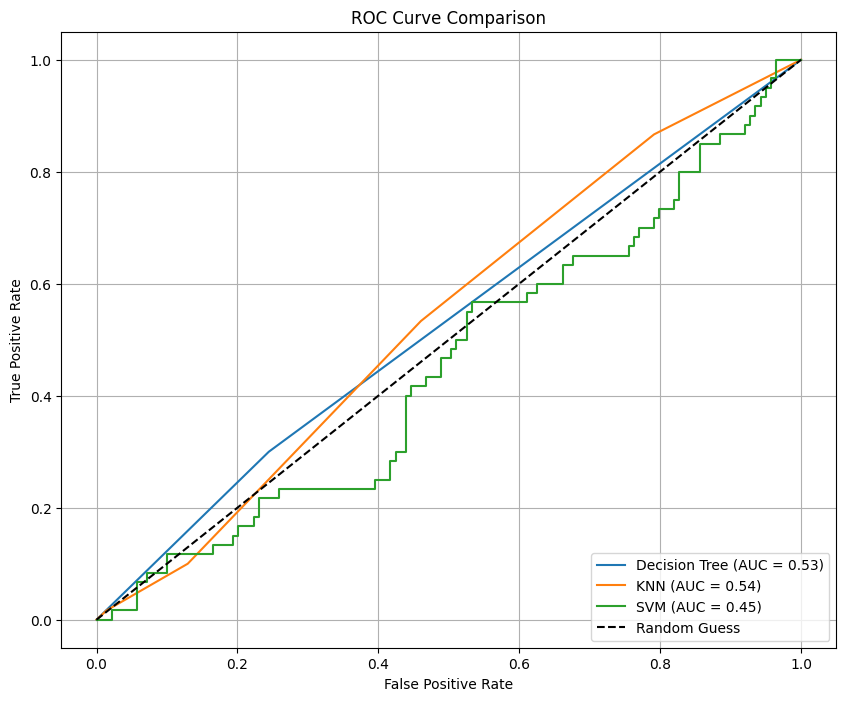

C:\Users\Asus lapto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.61809,0.346154,0.3,0.321429
KNN,0.638191,0.25,0.1,0.142857
SVM,0.698492,0.0,0.0,0.0


In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute ROC and AUC for each model
def compute_roc_metrics(model, X_test, y_test):
    probabilities = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    auc_score = roc_auc_score(y_test, probabilities)
    return fpr, tpr, auc_score

# Compute metrics for each model
metrics = {
    'Decision Tree': compute_roc_metrics(dt, X_test, y_test),
    'KNN': compute_roc_metrics(knn, X_test, y_test),
    'SVM': compute_roc_metrics(svm, X_test, y_test)
}

# Plotting ROC curves
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, auc_score) in metrics.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Compute additional metrics
final_metrics = {}
for model_name, model in [('Decision Tree', dt), ('KNN', knn), ('SVM',svm)]:
    y_pred = model.predict(X_test)
    final_metrics[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred).tolist()  # For better visualization
    }


metrics_df = pd.DataFrame(final_metrics).T
metrics_df_display = metrics_df.drop(columns=["Confusion Matrix"])  # Exclude confusion matrices for clarity

# Show the table of metrics
metrics_df_display
